<a href="https://colab.research.google.com/github/gustavoep/geospatial_python/blob/main/Geo_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import os

In [28]:
pip install richdem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import richdem as rd
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio

In [31]:
print("The current working directory is:")

print(os.getcwd())


The current working directory is:
/content


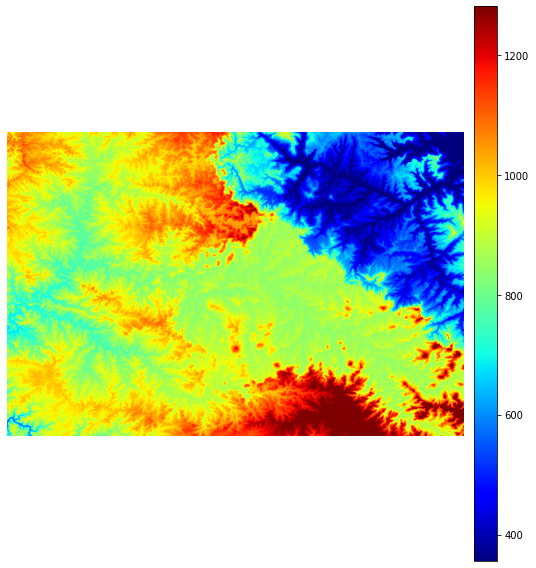

{'vmin': 356.20098876953125, 'vmax': 1281.0701464843705}

In [83]:
dem  = rd.LoadGDAL("DEM30m.tif", no_data=0)
rd.rdShow(dem, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,8))

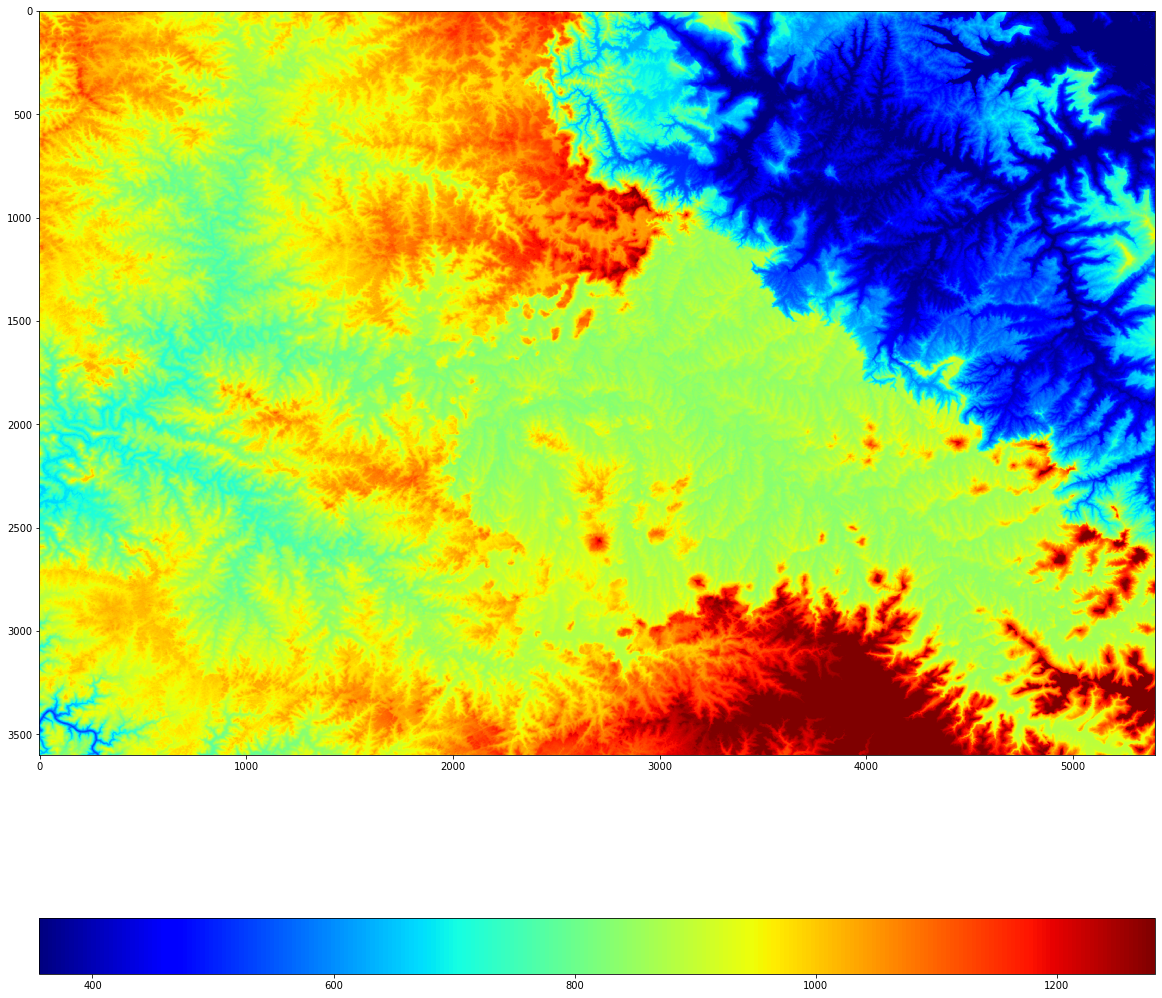

In [84]:
# Plotting
plt.figure(figsize = (20,20))
plt.imshow(dem, cmap = 'jet', interpolation = 'nearest', vmin = 356, vmax = 1282)
plt.colorbar(orientation ='horizontal')
plt.show()

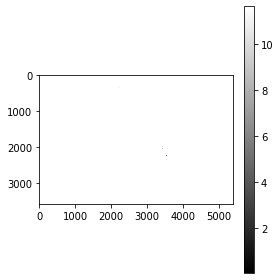

{'vmin': 0.0579833984375, 'vmax': 11.63702392578125}

In [85]:
#Comparing filled vs. unfilled DEMs

#Copy the DEM so we can compare the altered DEM to the unaltered original
demorig = dem.copy()
dem2 = dem

#Fill depressions in the DEM. The data is modified in place, but, since we
#made a copy above neither time nor memory is really saved.
rd.FillDepressions(dem2, epsilon=False, in_place=True)

#Get the difference of the filled and unfilled DEM
diff = dem2 - demorig

#Display the difference. Do not plot values where there was no difference.
rd.rdShow(diff, ignore_colours=[0])

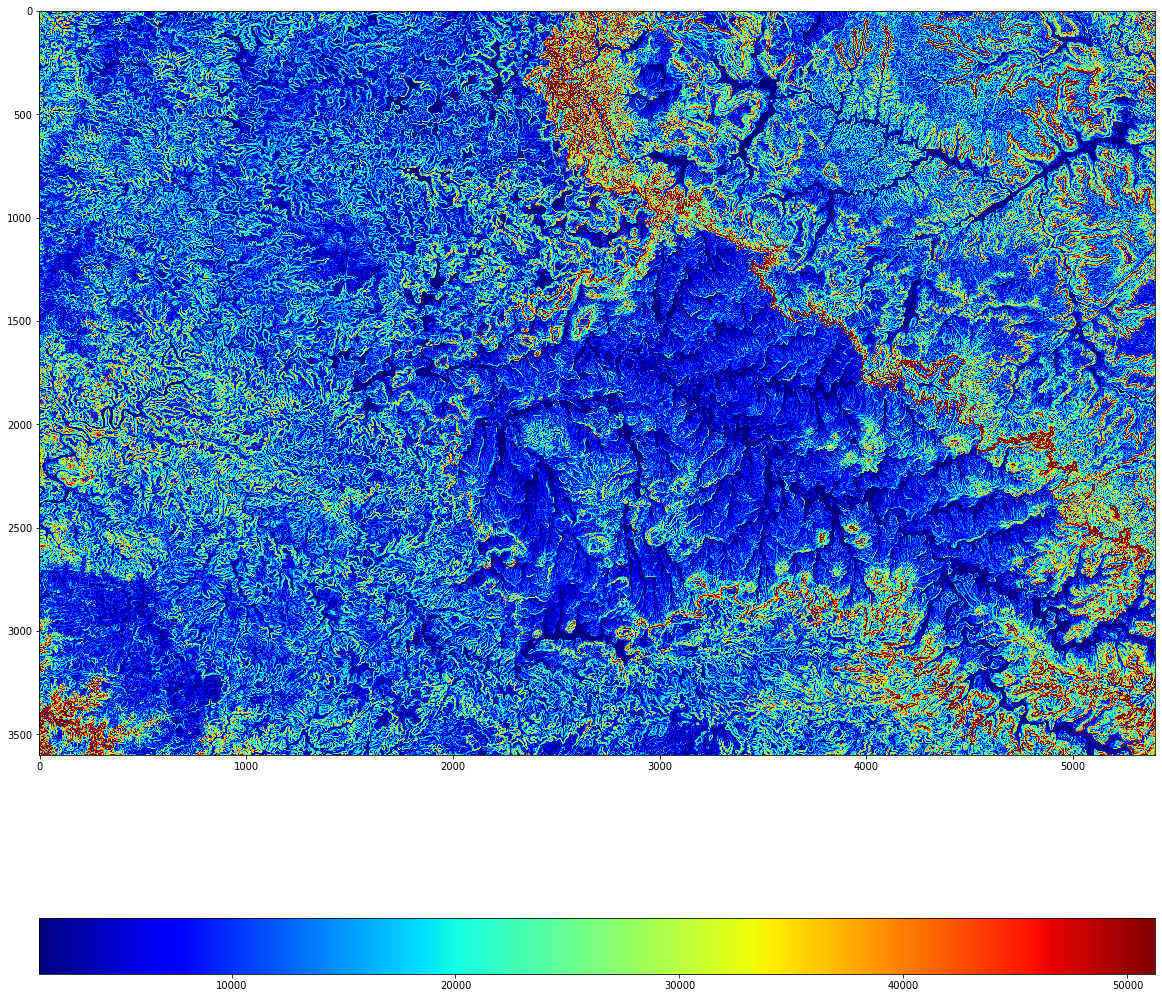

In [86]:
#DECLIVIDADE

slope = rd.TerrainAttribute(dem, attrib='slope_riserun')

plt.figure(figsize = (20,20))
plt.imshow(slope, cmap = 'jet', interpolation = 'nearest', vmin = 1424, vmax = 51253)
plt.colorbar(orientation = 'horizontal')
plt.show()

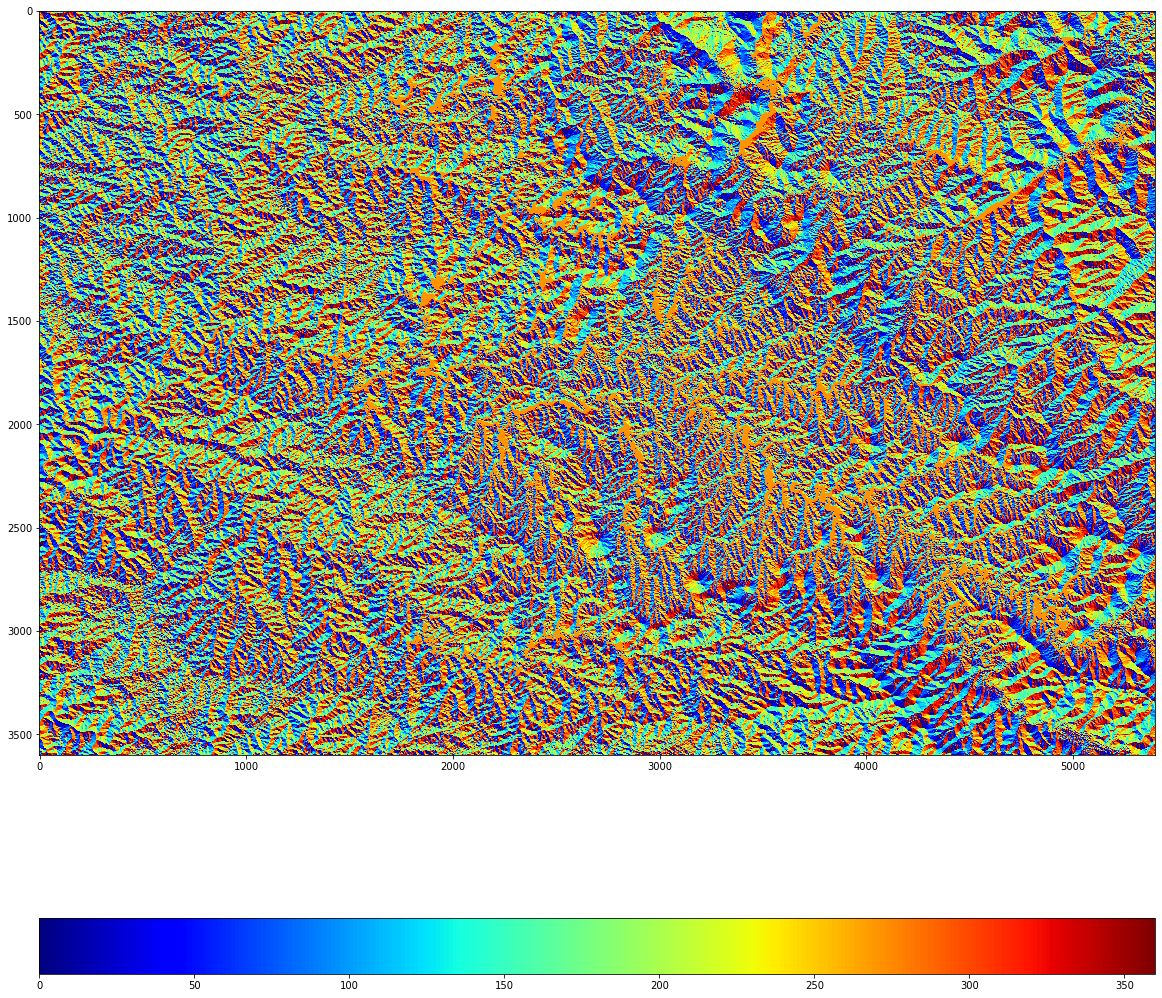

In [87]:
# Aspect
aspect = rd.TerrainAttribute(dem, attrib='aspect')
plt.figure(figsize = (20,20))
plt.imshow(aspect, cmap = 'jet', interpolation = 'nearest', vmin = 0, vmax = 360)
plt.colorbar(orientation = 'horizontal')
plt.show()

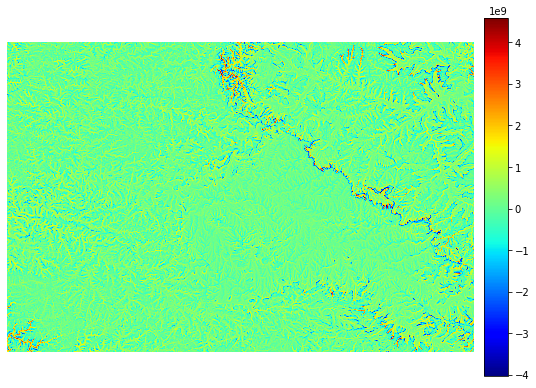

{'vmin': -4038080537.6, 'vmax': 4593009152.0}

In [88]:
# Profile curvature
profile_curvature = rd.TerrainAttribute(dem, attrib='profile_curvature')
rd.rdShow(profile_curvature, axes=False, cmap='jet', figsize=(8,5.5))

#plt.figure(figsize = (20,20))
#plt.imshow(profile_curvature, cmap = 'jet', interpolation = 'nearest', vmin = -2, vmax = 2)
#plt.colorbar(orientation = 'horizontal')
#plt.show()

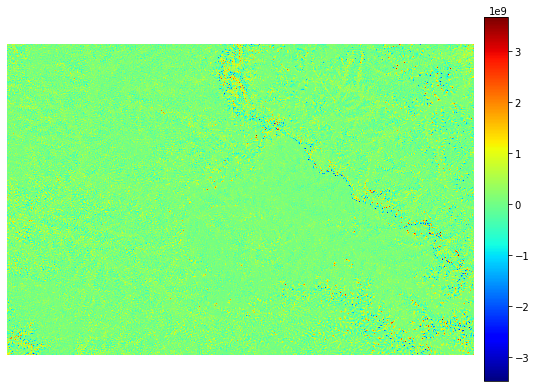

{'vmin': -3465635404.8, 'vmax': 3668513336.3199987}

In [89]:
# Planform curvature
planform_curvature = rd.TerrainAttribute(dem, attrib='planform_curvature')
rd.rdShow(planform_curvature, axes=False, cmap='jet', figsize=(8,5.5))

#plt.figure(figsize = (20,20))
#plt.imshow(planform_curvature, cmap = 'jet', interpolation = 'nearest', vmin = -1.5, vmax = 1.5)
#plt.colorbar(location = 'bottom')
#plt.show()